In [11]:
ALPHAVANTAGE_APIKEY = "VBG5xmxqpRXRex_xQ-9Y"
symbol = "MSFT"
interval = '30min'
outputsize = 'compact'
datatype = 'csv'
function = 'TIME_SERIES_INTRADAY'
base_url = f"https://www.alphavantage.co/query?symbol={symbol}&apikey={ALPHAVANTAGE_APIKEY}"
url = base_url + f"&interval={interval}&function={function}&outputsize={outputsize}&datatype={datatype}"

In [12]:
url

'https://www.alphavantage.co/query?symbol=MSFT&apikey=VBG5xmxqpRXRex_xQ-9Y&interval=30min&function=TIME_SERIES_INTRADAY&outputsize=compact&datatype=csv'

In [15]:
import pandas as pd

df = pd.read_csv(url)
df.head()

,timestamp,open,high,low,close,volume
0,2018-09-05 15:30:00,108.4727,108.515,108.1300,108.510,7834718
1,2018-09-05 15:00:00,108.7200,108.890,108.4150,108.490,1604599
2,2018-09-05 14:30:00,108.9400,109.085,108.5500,108.700,1193145
3,2018-09-05 14:00:00,109.1200,109.180,108.9000,108.955,1166528
4,2018-09-05 13:30:00,109.2336,109.350,108.9799,109.105,1175970


In [25]:
symbol = "AAPL"
outputsize = 'full'
datatype = 'csv'
function = 'TIME_SERIES_DAILY_ADJUSTED'
url = base_url + f"&function={function}&outputsize={outputsize}&datatype={datatype}"

df = pd.read_csv(url)
df.index = pd.DatetimeIndex(df['timestamp'].values)
df.head()

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
2018-09-05,2018-09-05,111.010,111.420,108.100,108.49,108.49,28246869,0.0,1.0
2018-09-04,2018-09-04,110.850,111.955,110.220,111.71,111.71,22634641,0.0,1.0
2018-08-31,2018-08-31,111.685,112.777,111.515,112.33,112.33,23222713,0.0,1.0
2018-08-30,2018-08-30,111.670,112.610,111.440,111.95,111.95,22798702,0.0,1.0
2018-08-29,2018-08-29,110.450,112.030,110.270,112.02,112.02,20818044,0.0,1.0


In [22]:
symbol = "AAPL"
outputsize = 'full'
datatype = 'csv'
function = 'TIME_SERIES_DAILY'
url = base_url + f"&function={function}&outputsize={outputsize}&datatype={datatype}"

df_ = pd.read_csv(url)
df_.index = pd.DatetimeIndex(df_['timestamp'].values)
df_.head()

,timestamp,open,high,low,close,volume
2018-09-05,2018-09-05,111.010,111.420,108.100,108.49,28246869
2018-09-04,2018-09-04,110.850,111.955,110.220,111.71,22634641
2018-08-31,2018-08-31,111.685,112.777,111.515,112.33,23222713
2018-08-30,2018-08-30,111.670,112.610,111.440,111.95,22798702
2018-08-29,2018-08-29,110.450,112.030,110.270,112.02,20818044


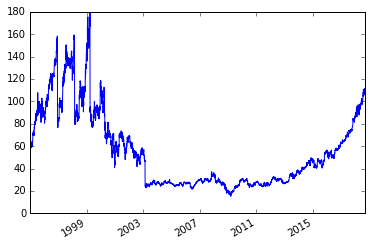

In [23]:
%matplotlib inline
df_['open'].plot()

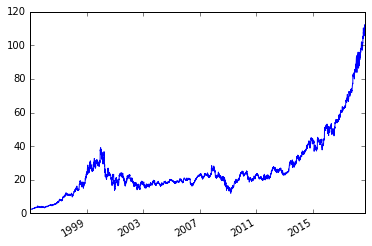

In [26]:
df['adjusted_close'].plot()

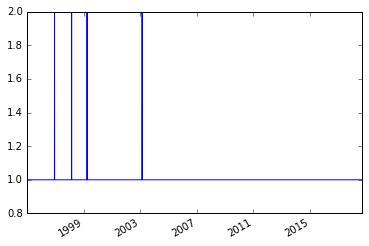

In [27]:
df['split_coefficient'].plot()

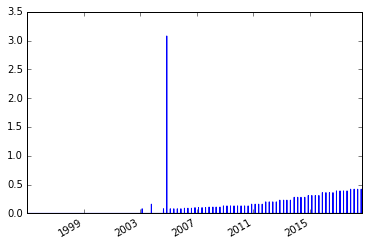

In [29]:
df['dividend_amount'].plot()

In [30]:
df.index

DatetimeIndex(['2018-09-05', '2018-09-04', '2018-08-31', '2018-08-30',
               '2018-08-29', '2018-08-28', '2018-08-27', '2018-08-24',
               '2018-08-23', '2018-08-22',
               ...
               '1995-01-16', '1995-01-13', '1995-01-12', '1995-01-11',
               '1995-01-10', '1995-01-09', '1995-01-06', '1995-01-05',
               '1995-01-04', '1995-01-03'],
              dtype='datetime64[ns]', length=5962, freq=None)

In [44]:
symbols = ["FRED/DCOILWTICO", "WGC/GOLD_DAILY_USD", "FRED/DTWEXM",
           "USTREASURY/YIELD", "FRED/T10Y2Y"]

In [47]:
import quandl
from time import sleep
from tqdm import tqdm_notebook

QUANDL_APIKEY = "VBG5xmxqpRXRex_xQ-9Y"
quandl.ApiConfig.api_key = QUANDL_APIKEY

for symbol in tqdm_notebook(symbols):
    try:
        df = quandl.get(symbol)
    except:
        continue
    name = symbol.split('/')[1]
    path = f'../datasets/macro/{name}.csv'
    df.to_csv(path)
    sleep(1)

HBox(children=(IntProgress(value=0, max=5), HTML(value='')))

In [2]:
import xgboost as xgb

In [3]:
from sklearn.datasets import load_iris
data = load_iris()

In [20]:
X = data.data
y = data.target
dtrain = xgb.DMatrix(X, label=y)
param = {'booster': 'dart',
         'max_depth': 5, 'learning_rate': 0.1,
         'objective': 'reg:linear',
         'sample_type': 'uniform',
         'rate_drop': 0.1,
         'skip_drop': 0.5,
         'silent': True}
num_round = 50
bst = xgb.train(param, dtrain, num_round)

In [21]:
bst.predict(dtrain)

array([0.0110487 , 0.0110487 , 0.0110487 , 0.0110487 , 0.0110487 ,
       0.0110487 , 0.0110487 , 0.0110487 , 0.0110487 , 0.0110487 ,
       0.0110487 , 0.0110487 , 0.0110487 , 0.0110487 , 0.0110487 ,
       0.0110487 , 0.0110487 , 0.0110487 , 0.0110487 , 0.0110487 ,
       0.0110487 , 0.0110487 , 0.0110487 , 0.0110487 , 0.0110487 ,
       0.0110487 , 0.0110487 , 0.0110487 , 0.0110487 , 0.0110487 ,
       0.0110487 , 0.0110487 , 0.0110487 , 0.0110487 , 0.0110487 ,
       0.0110487 , 0.0110487 , 0.0110487 , 0.0110487 , 0.0110487 ,
       0.0110487 , 0.0110487 , 0.0110487 , 0.0110487 , 0.0110487 ,
       0.0110487 , 0.0110487 , 0.0110487 , 0.0110487 , 0.0110487 ,
       0.9882233 , 0.9882233 , 1.0036968 , 0.98878807, 0.98878807,
       0.98878807, 0.9882233 , 0.9876211 , 0.98878807, 0.98878807,
       0.98878807, 0.98878807, 0.98878807, 0.98878807, 0.98878807,
       0.9882233 , 0.98878807, 0.98878807, 0.98878807, 0.98878807,
       1.0574813 , 0.98878807, 1.0042615 , 0.98878807, 0.98878

In [5]:
dtrain = axgb.DMatrix()

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3